In [38]:
import matplotlib
from plantcv import plantcv as pcv
from plantcv.utils import tabulate_bayes_classes
from plantcv.parallel import WorkflowInputs
import numpy as np

In [89]:
args = WorkflowInputs(
    images=[r"C:\Cantonese\244.png"],
    names="image1",
    result="side07.json",
    debug="plot"
)
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 2
pcv.params.text_thickness = 10

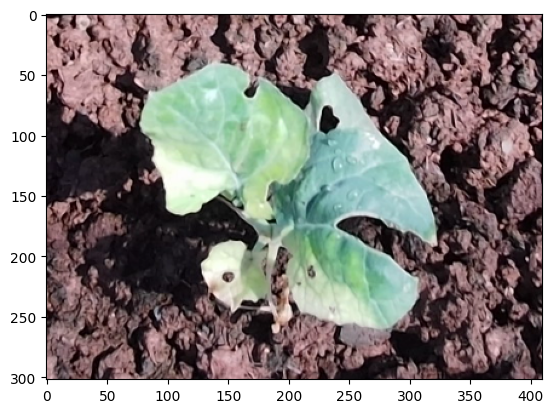

In [90]:
img, path, filename = pcv.readimage(filename=args.image1)

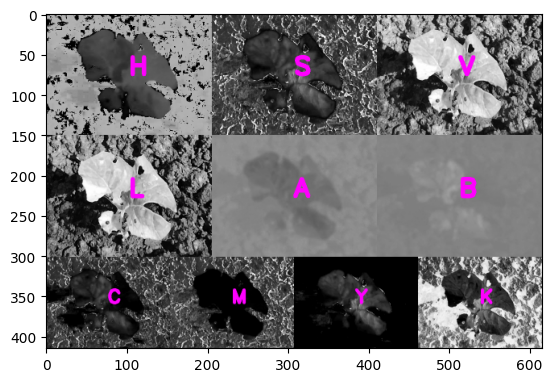

In [91]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

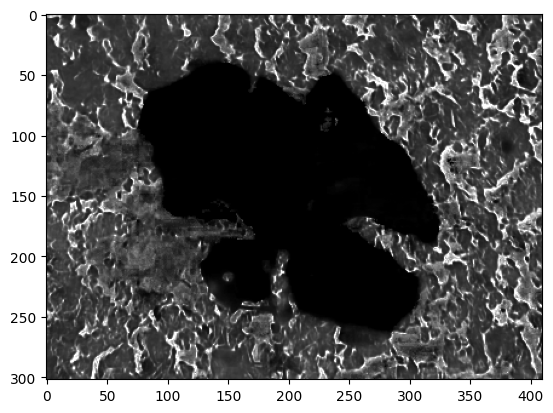

In [93]:
a = pcv.rgb2gray_cmyk(rgb_img=img, channel='m')

In [49]:
hist = pcv.visualize.histogram(img=a)

alt.Chart(...)

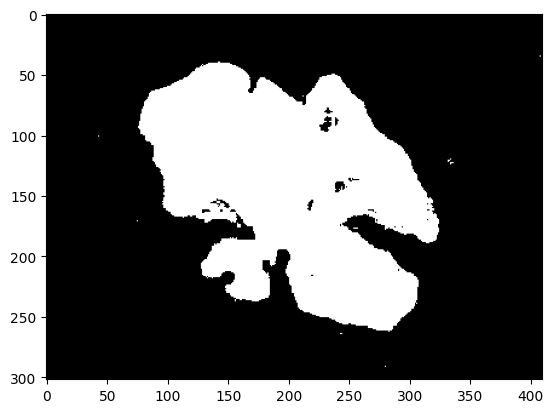

In [104]:
thresh = pcv.threshold.binary(gray_img=a, threshold=5, object_type='dark')

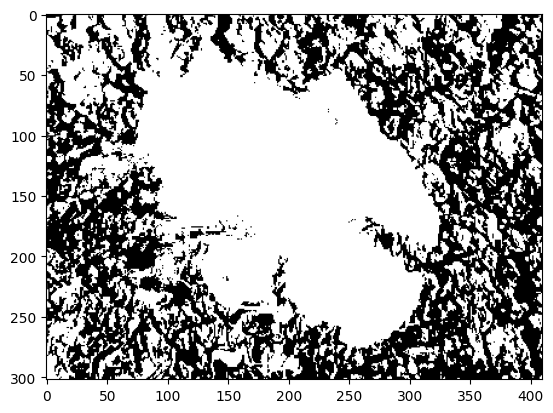

In [102]:
thresh = pcv.threshold.gaussian(gray_img=a, ksize=6000, offset=9,
                                object_type='dark')

In [8]:
print("Shape of thresh image:", thresh.shape)


Shape of thresh image: (1477, 1108)


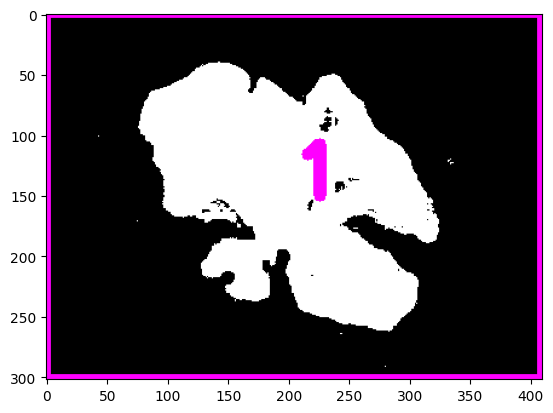

In [105]:
roi = pcv.roi.rectangle(img=thresh, x=0, y=0, h=thresh.shape[0], w=thresh.shape[1])

In [8]:
roi = pcv.roi.custom(img=thresh, vertices=[[630, 800],[800, 1200], #[x,y]
                                           [400, 1400],[100,1000],
                                           [300,900],[420,1000],
                                           [420,950]] )

pcv.plot_image(roi)


RuntimeError: An ROI extends outside of the image!

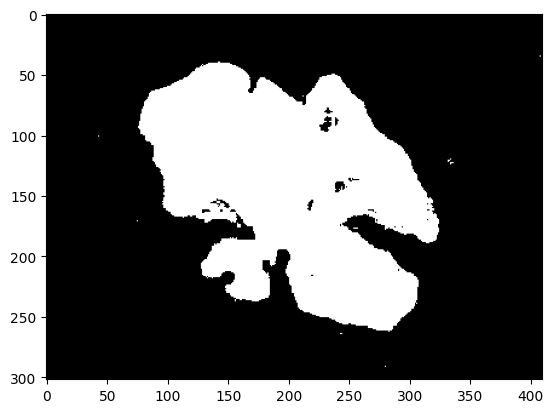

In [106]:
kept_mask = pcv.roi.filter(mask=thresh, roi=roi, roi_type='cutto')

c:\Plant_analysis\.venv\lib\site-packages\plantcv\plantcv\plot_image.py:34: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(img, cmap="gray")


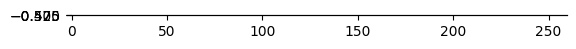

In [107]:
cropped_mask = kept_mask[800:1400, 150:800] #[y:y2, x1:x2]
cropped_img = img[800:1400, 150:800]
pcv.plot_image(cropped_mask)

In [108]:
cropped_mask = kept_mask
cropped_img = img

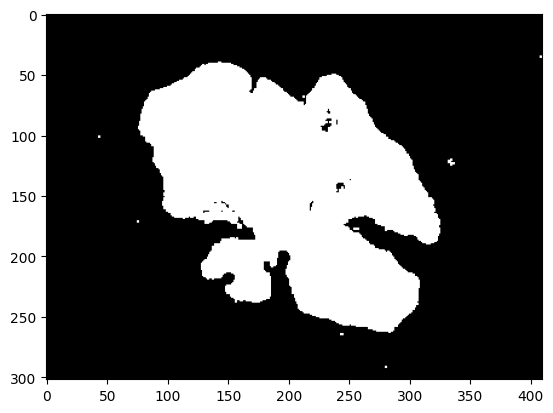

In [109]:
mask_dilated = pcv.dilate(gray_img=cropped_mask, ksize=2, i=1)

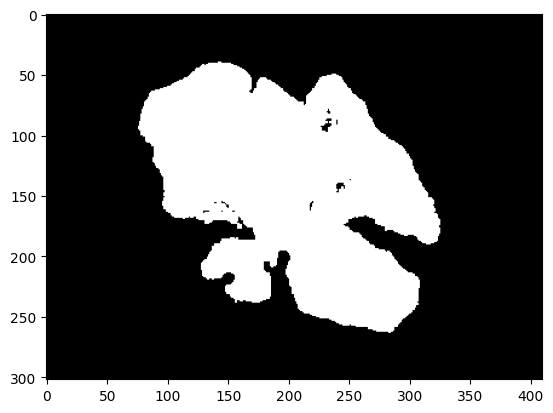

In [110]:
mask_fill = pcv.fill(bin_img=mask_dilated, size=30)


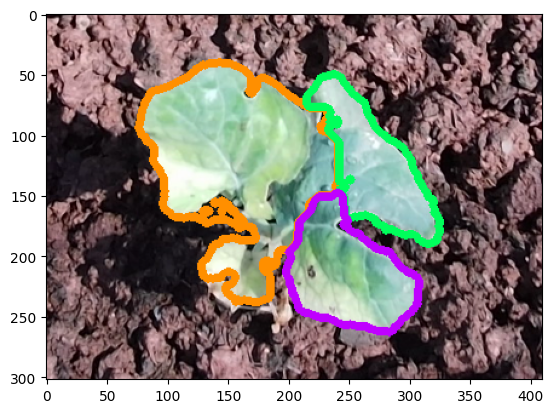

In [114]:
labels = pcv.watershed_segmentation(rgb_img = cropped_img,
                                    mask = mask_fill,
                                    distance=40)

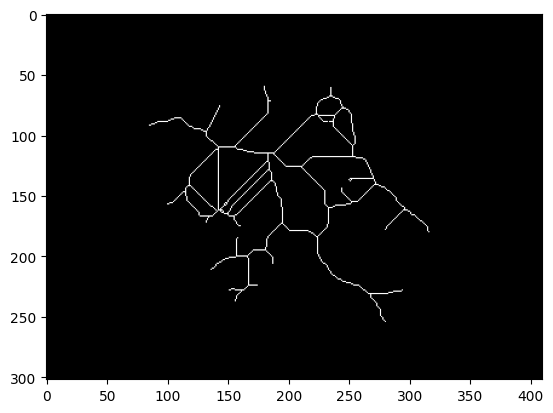

In [115]:
skeleton = pcv.morphology.skeletonize(mask=mask_fill)

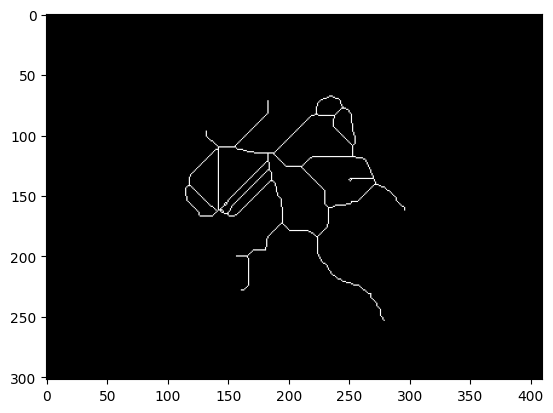

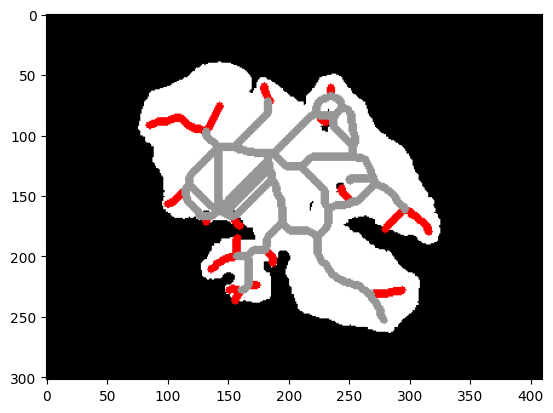

In [116]:
pruned_skel, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=100, mask=mask_fill)

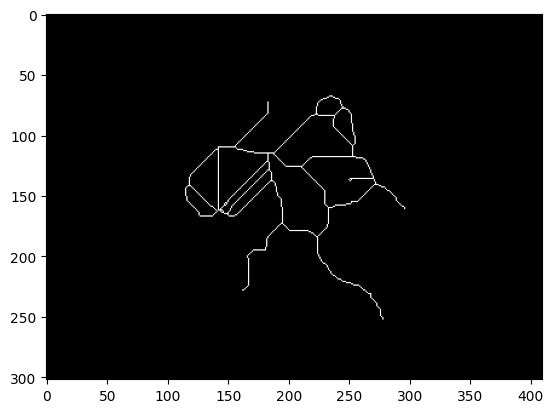

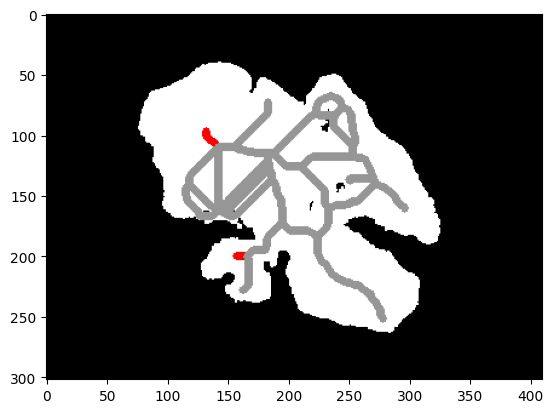

In [117]:
pruned_skel, seg_img, edge_objects = pcv.morphology.prune(skel_img=pruned_skel, size=50, mask=mask_fill)

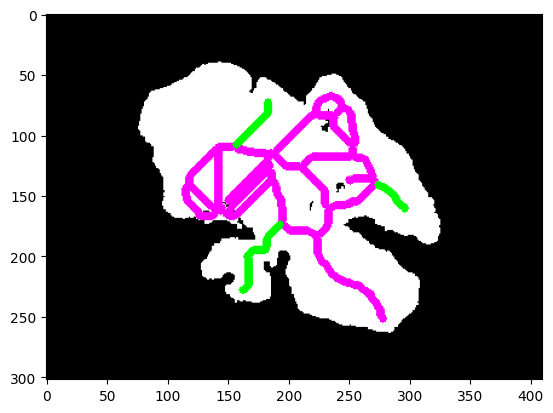

In [118]:
leaf_obj, stem_obj= pcv.morphology.segment_sort(skel_img=pruned_skel, objects=edge_objects, mask=mask_fill)

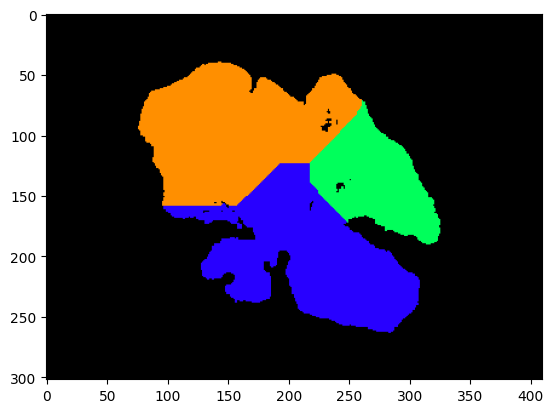

In [119]:
filled_img = pcv.morphology.fill_segments(mask=mask_fill, objects=leaf_obj, label="default")

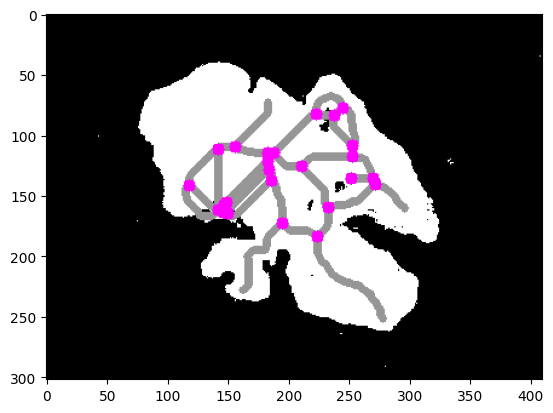

In [120]:
branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=pruned_skel, mask=cropped_mask, label="default")

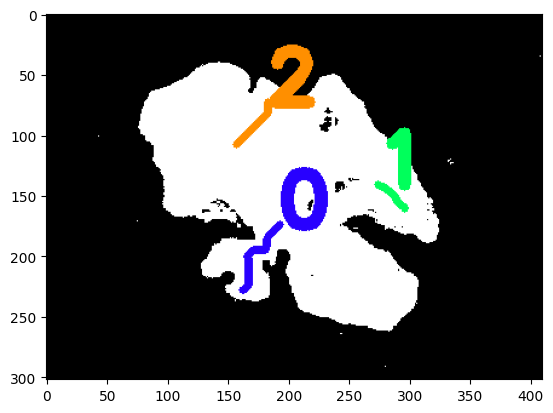

In [121]:
segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=pruned_skel,
                                                       objects=leaf_obj,
                                                       mask=cropped_mask)

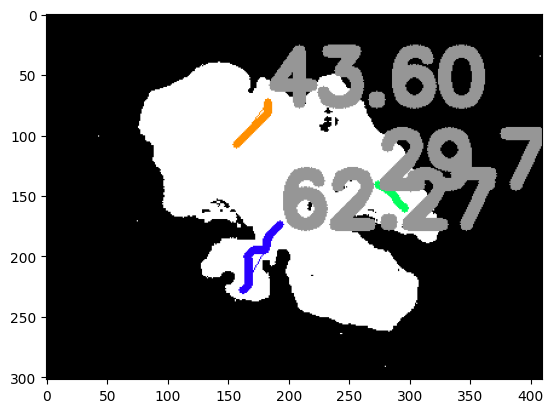

In [122]:
labeled_img = pcv.morphology.segment_euclidean_length(segmented_img=segmented_img, 
                                                      objects=leaf_obj, label="default")

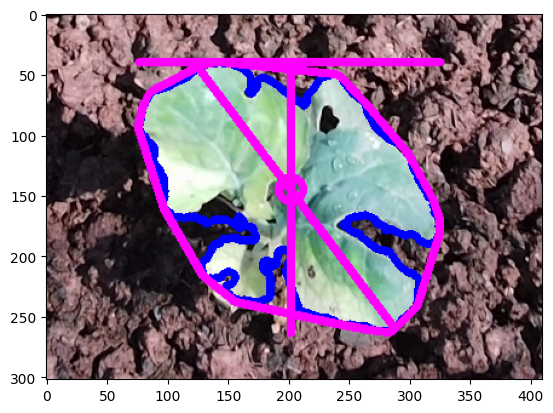

In [123]:
shape_img = pcv.analyze.size(img=cropped_img, labeled_mask=mask_fill, label="default")